In [1]:
#load the libraries we have been using
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
X_w = iris.data[:, :2]  #load the first two features of the iris data
y_w = iris.target       #load the target of the iris data
X = X_w[y_w != 0]
y = y_w[y_w != 0]
X_1 = X[y == 1]
X_2 = X[y == 2]

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=7,stratify=y)

In [3]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
svm_est = Pipeline([('scaler',StandardScaler()),('svc',SVC())])

In [4]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1, 10]

In [5]:
param_grid = dict(svc__gamma=gammas, svc__C=Cs)

In [6]:
param_grid

{'svc__gamma': [0.001, 0.01, 0.1, 1, 10], 'svc__C': [0.001, 0.01, 0.1, 1, 10]}

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2,
random_state=7)


In [8]:
cv

StratifiedShuffleSplit(n_splits=5, random_state=7, test_size=0.2,
            train_size=None)

In [9]:
cv=10

In [10]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(svm_est, param_grid=param_grid, cv=cv)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10]})

In [11]:
grid_cv.best_params_

{'svc__C': 10, 'svc__gamma': 0.1}

In [12]:
grid_cv.best_score_

0.7125

In [13]:
from sklearn.model_selection import RandomizedSearchCV
rand_grid = RandomizedSearchCV(svm_est, param_distributions=param_grid,
cv=cv,n_iter=10)
rand_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('svc', SVC())]),
                   param_distributions={'svc__C': [0.001, 0.01, 0.1, 1, 10],
                                        'svc__gamma': [0.001, 0.01, 0.1, 1,
                                                       10]})

In [14]:
rand_grid.best_params_

{'svc__gamma': 0.1, 'svc__C': 10}

In [15]:
from itertools import product
#Minima and maxima of both features
xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])
#Grid/Cartesian product with itertools.product
test_points = np.array([[xx, yy] for xx, yy in product(np.linspace(xmin,xmax), np.linspace(ymin, ymax))])
#Predictions on the grid
test_preds = grid_cv.predict(test_points)


Text(0.5, 1.0, 'RBF-separated classes')

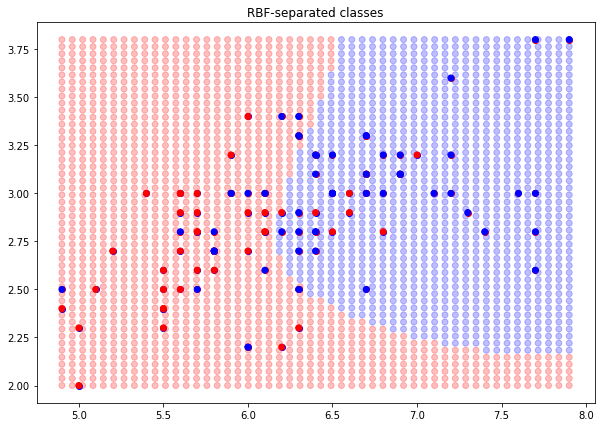

In [17]:
X_1 = X[y == 1]
X_2 = X[y == 2]
%matplotlib inline
plt.figure(figsize=(10,7))   #change figure-size for easier viewing
plt.scatter(X_2[:,0],X_2[:,1], color = 'red')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')
colors = np.array(['r', 'b'])
plt.scatter(test_points[:, 0], test_points[:, 1],
color=colors[test_preds-1], alpha=0.25)
plt.scatter(X[:, 0], X[:, 1], color=colors[y-1])
plt.title("RBF-separated classes")